# 🌷Iris Flowers Detection 


**Dataset**: [🌷Iris Flowers Dataset](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

### **Business Probems:**
- Automatic grading & sorting of flowers in Agriculture,Horticulture and flowerexport companies
- Classify incoming flowers to route them to correct sales channelin E-commerce / Retail (Flowers)
- Automatic grading & sorting of flowers export companies
### **Business Impact:**
- Reduce manual labor, minimize waste, increase export price
- Reduce returns, increase customer satisfaction, maximize profit margin


## Importing Libraries

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,IsolationForest,BaggingClassifier,StackingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,auc,roc_auc_score,roc_curve,auc,average_precision_score
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV,StratifiedKFold,cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,RobustScaler,LabelEncoder,PolynomialFeatures
import seaborn as sns
sns.set_palette('husl')
plt.style.use('seaborn-v0_8-dark')
plt.style.use('seaborn-v0_8-darkgrid')
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import loguniform, uniform,randint
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.datasets import load_iris
import plotly.express as px
from scipy import stats

In [124]:
#loading dataset
df = sns.load_dataset('iris')
print('✅ Data Loaded Successfully')
print(f'Shape : {df.shape[0]} Rows x {df.shape[1]} columns')
print('='*80)
print(df)

✅ Data Loaded Successfully
Shape : 150 Rows x 5 columns
     sepal_length  sepal_width  petal_length  petal_width    species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


## Initial Data Inspection

In [125]:
#Data Information and Statistical Summary
print('='*50)
print(' Data Information')
print('='*50)
print(df.info())
print('='*50)
print(' Statistical Summary')
print('='*50)
print(df.describe())
print('='*50)
print(' Data Types')
print('='*50)
print(df.dtypes)
print('✔️All independent features are numeric data types')

 Data Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None
 Statistical Summary
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000

## Data Quality Assesment

In [126]:
# Checking for Missing Values and Duplicate Values
print('='*50)
print('Missing values')
print('='*50)
Missing= df.isnull().sum()
if Missing.sum()==0: 
    print('✔️No Missing Values found in the dataset')
else:
    print(f'Missing Values :{Missing}')
print('='*50)
print(' Duplicate values')
print('='*50)
Duplicate= df.duplicated().sum()
if Duplicate==0:
    print('✔️No Duplicate Values found in the dataset')
else:
    print(f'Duplicate Values :{Duplicate}')


Missing values
✔️No Missing Values found in the dataset
 Duplicate values
Duplicate Values :1


In [127]:
#Removing Duplicates
df.drop_duplicates(inplace=True)
print('='*50)
print(' Duplicate values')
print('='*50)
Duplicate= df.duplicated().sum()
if Duplicate==0:
    print('✔️No Duplicate Values found in the dataset')
else:
    print(f'Duplicate Values :{Duplicate}')

 Duplicate values
✔️No Duplicate Values found in the dataset


In [128]:
# Map species to colors for visualizations
species_unique = df['species'].unique()
color_map = {species: idx for idx, species in enumerate(species_unique)}
df['species_color'] = df['species'].map(color_map)
print(color_map)

{'setosa': 0, 'versicolor': 1, 'virginica': 2}


## EDA 

## statistical Analysis

In [129]:
# Calculate basic statistics like mean, median, standard deviation, etc.
# Calculate additional statistics like skewness and kurtosis
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
stats_df = df[numerical_cols].describe()
stats_df.loc['skew'] = df[numerical_cols].skew()
stats_df.loc['kurtosis'] = df[numerical_cols].kurtosis()
print("\nNumerical Analysis Statistics:\n", stats_df)


Numerical Analysis Statistics:
           sepal_length  sepal_width  petal_length  petal_width
count       149.000000   149.000000    149.000000   149.000000
mean          5.843624     3.059732      3.748993     1.194631
std           0.830851     0.436342      1.767791     0.762622
min           4.300000     2.000000      1.000000     0.100000
25%           5.100000     2.800000      1.600000     0.300000
50%           5.800000     3.000000      4.300000     1.300000
75%           6.400000     3.300000      5.100000     1.800000
max           7.900000     4.400000      6.900000     2.500000
skew          0.312826     0.307149     -0.263101    -0.090076
kurtosis     -0.569006     0.226236     -1.408270    -1.339953


In [130]:
# Normality test using Shapiro-Wilk
for col in numerical_cols:
    stat, p = stats.shapiro(df[col])
    print(f"\nShapiro-Wilk Test for {col}: Statistic={stat:.4f}, p-value={p:.4f}")


Shapiro-Wilk Test for sepal_length: Statistic=0.9756, p-value=0.0092

Shapiro-Wilk Test for sepal_width: Statistic=0.9850, p-value=0.1062

Shapiro-Wilk Test for petal_length: Statistic=0.8768, p-value=0.0000

Shapiro-Wilk Test for petal_width: Statistic=0.9019, p-value=0.0000


## Univariate Analysis

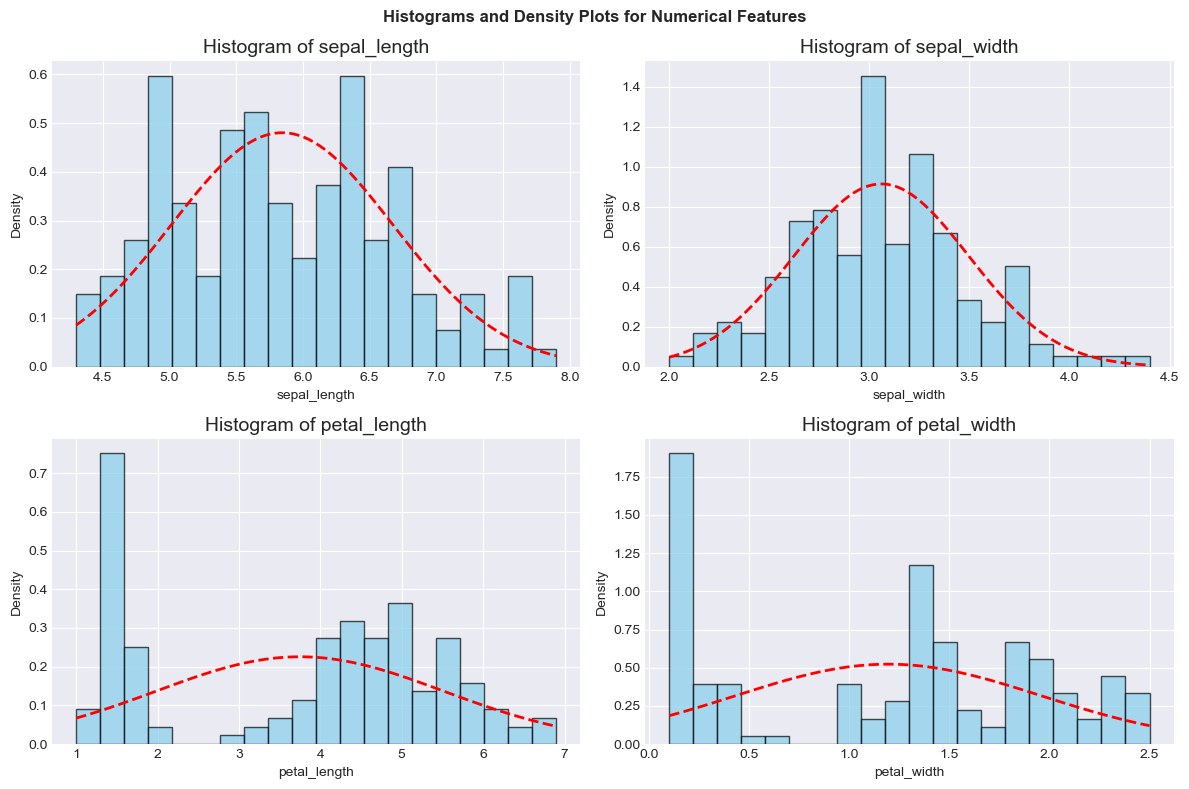

In [131]:
# Histograms and Density Plots for Numerical Features
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Histograms and Density Plots for Numerical Features',fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    axes[i].hist(df[col], bins=20, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')
    # Add density line
    x = np.linspace(df[col].min(), df[col].max(), 100)
    axes[i].plot(x, stats.norm.pdf(x, df[col].mean(), df[col].std()), 'r--', lw=2)
plt.tight_layout()
plt.show()

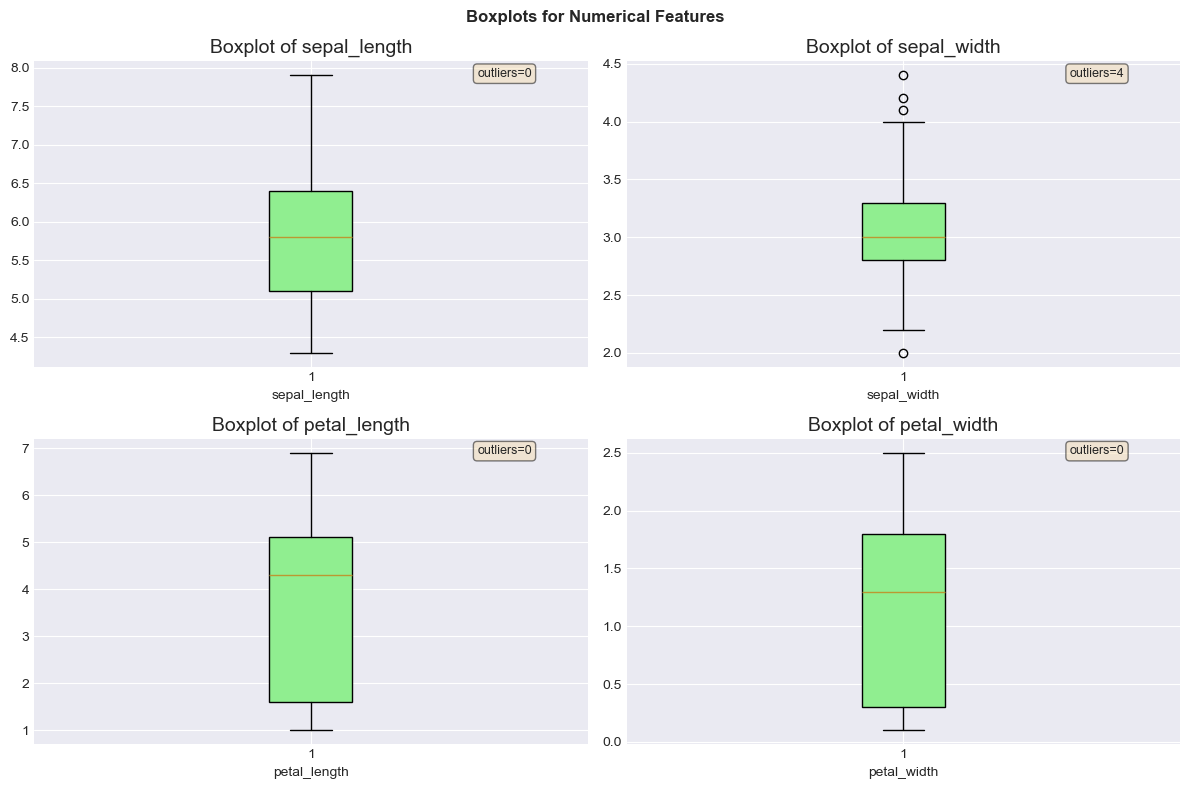

In [132]:
# Boxplots for Numerical Features to identify the outliers
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots for Numerical Features',fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    axes[i].boxplot(df[col],  patch_artist=True, boxprops=dict(facecolor='lightgreen'))
    axes[i].set_title(f'Boxplot of {col}', fontsize=14)
    axes[i].set_xlabel(col)
    q1=df[col].quantile(0.25)
    q3=df[col].quantile(0.75)
    iqr=q3-q1
    outliers=((df[col]<(q1-1.5*iqr))|(df[col]>(q3+1.5*iqr))).sum()
    axes[i].text(0.85,0.95,f'outliers={outliers}',transform=axes[i].transAxes,ha='center',fontsize=9,bbox=dict(boxstyle='round',facecolor='wheat',alpha=0.5))
plt.tight_layout()
plt.show()

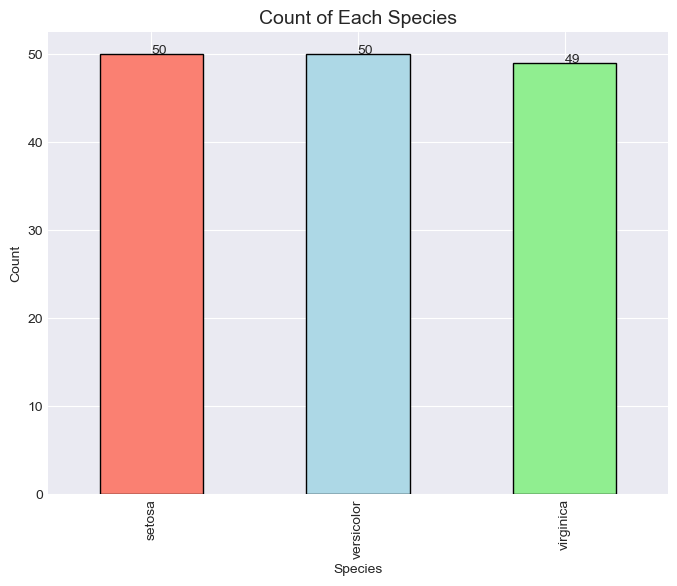

In [133]:
# Count Plot for Categorical Feature (Species)
plt.figure(figsize=(8, 6))
df['species'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'], edgecolor='black')
plt.title('Count of Each Species', fontsize=14)
plt.xlabel('Species')
plt.ylabel('Count')
for i,j in enumerate(df['species'].value_counts()):
    plt.text(i,j,j)
plt.show()


## Bivariate Analysis

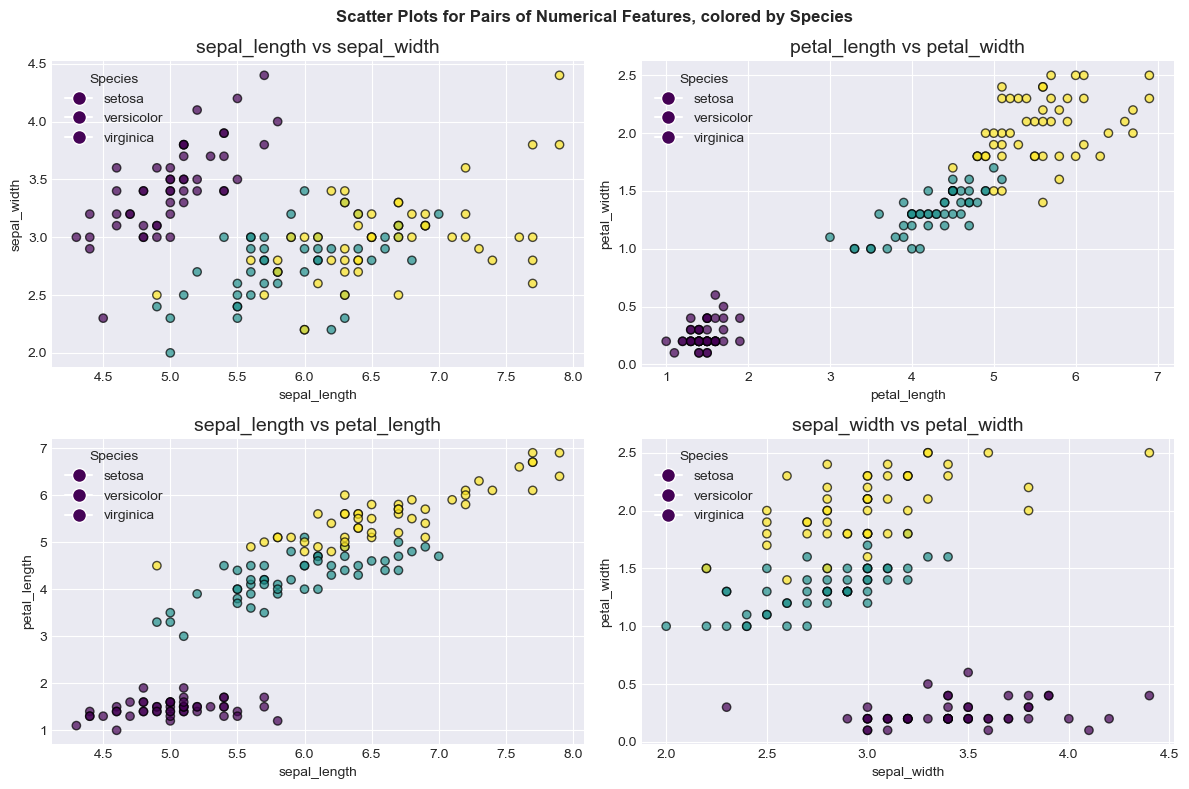

In [184]:
# Scatter Plots for Pairs of Numerical Features, colored by Species
pairs = [
    ('sepal_length', 'sepal_width'),
    ('petal_length', 'petal_width'),
    ('sepal_length', 'petal_length'),
    ('sepal_width', 'petal_width')
]
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Scatter Plots for Pairs of Numerical Features, colored by Species',fontweight='bold')
axes = axes.flatten()
for i, (x_col, y_col) in enumerate(pairs):
    axes[i].scatter(df[x_col], df[y_col], c=df['species_color'], cmap='viridis', alpha=0.7, edgecolor='k')
    axes[i].set_title(f'{x_col} vs {y_col}', fontsize=14)
    axes[i].set_xlabel(x_col)
    axes[i].set_ylabel(y_col)
    # Add legend
    handles = [plt.Line2D([0], [0], marker='o', color='w', label=species,
                          markerfacecolor=plt.cm.viridis(color_map[species]), markersize=10)
               for species in species_unique]
    axes[i].legend(handles=handles, title='Species')
plt.tight_layout()
plt.show()

## Numerical Analysis

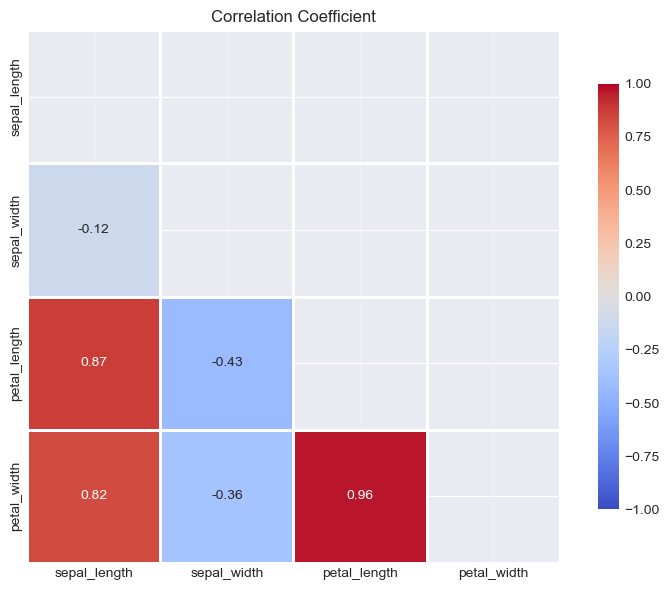

In [135]:
# Correlation Heatmap for Numerical Features
corr = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8},
            vmin=-1, vmax=1)
plt.title ('Correlation Coefficient', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()




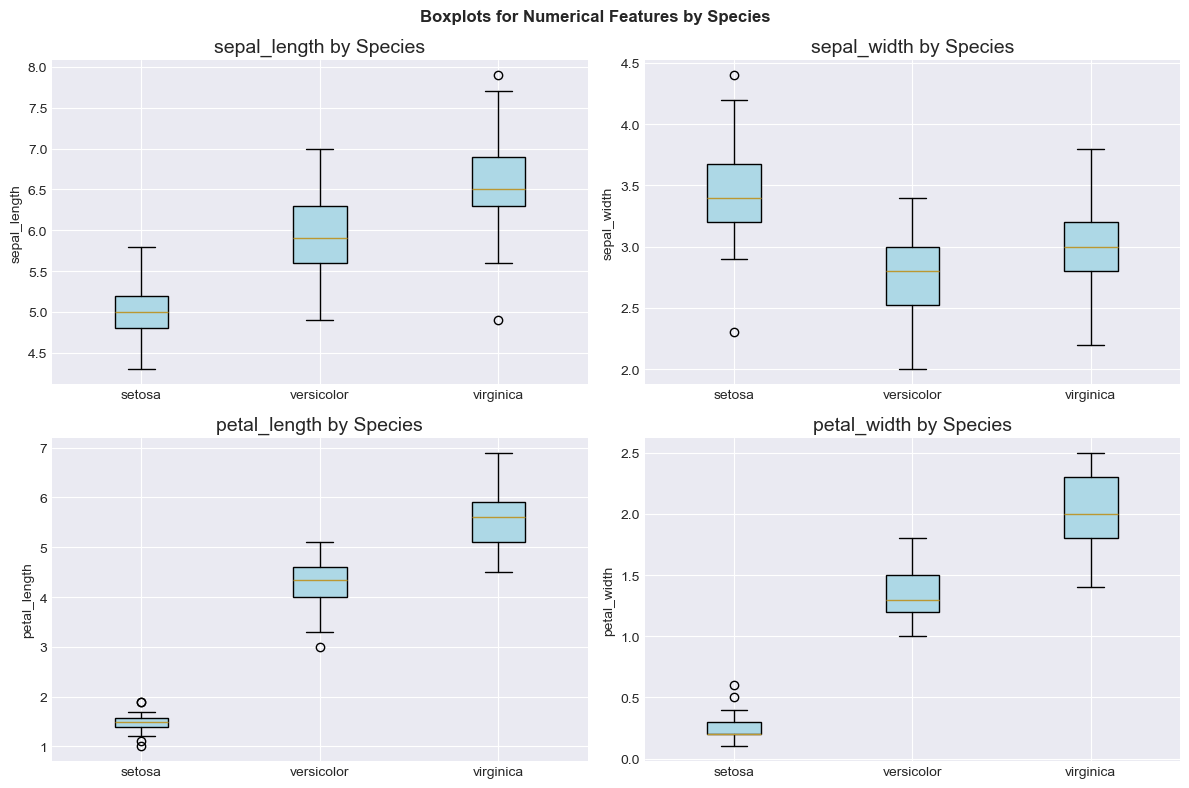

In [136]:
# Boxplots for Numerical Features by Species
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle('Boxplots for Numerical Features by Species',fontweight='bold')
axes = axes.flatten()
for i, col in enumerate(numerical_cols):
    data_by_species = [df[df['species'] == s][col] for s in species_unique]
    axes[i].boxplot(data_by_species, patch_artist=True,
                    boxprops=dict(facecolor='lightblue'))
    axes[i].set_title(f'{col} by Species', fontsize=14)
    axes[i].set_xticklabels(species_unique)
    axes[i].set_ylabel(col)
plt.tight_layout()
plt.show()

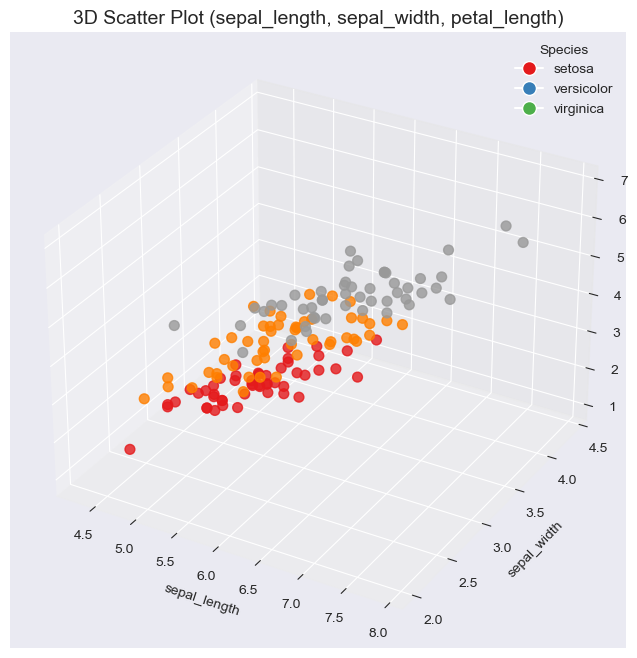

In [137]:
# 3D Scatter Plot for Three Features, colored by Species
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['sepal_length'], df['sepal_width'], df['petal_length'],
           c=df['species_color'], cmap='Set1', s=50, alpha=0.8)
ax.set_xlabel('sepal_length')
ax.set_ylabel('sepal_width')
ax.set_zlabel('petal_length')
ax.set_title('3D Scatter Plot (sepal_length, sepal_width, petal_length)', fontsize=14)
# Add legend
handles = [plt.Line2D([0], [0], marker='o', color='w', label=species,
                      markerfacecolor=plt.cm.Set1(color_map[species]), markersize=10)
           for species in species_unique]
ax.legend(handles=handles, title='Species')
plt.show()

In [138]:
# Function to detect outliers using IQR
def find_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    
    return outliers, lower_bound, upper_bound

# Apply to important numerical columns
important_cols = [ 'sepal_length', 'sepal_width', 'petal_length', 'petal_width']

print("Outlier Detection using IQR Method:\n" + "="*50)

for col in important_cols:
    outliers, low, high = find_outliers_iqr(df, col)
    print(f"{col}:")
    print(f"  → Lower bound: {low:,.2f} | Upper bound: {high:,.2f}")
    print(f"  → Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.2f}%)")
    if len(outliers) > 0:
        print(f"  → Outlier values sample: {sorted(outliers.head(6).tolist())}\n")
    else:
        print("  → No outliers detected\n")

outlier_summary = []

for col in important_cols:
    outliers_iqr, low, high = find_outliers_iqr(df, col)
    
    
    outlier_summary.append({
        'Column': col,
        'IQR Outliers': len(outliers_iqr),
        'Min Value': df[col].min(),
        'Max Value': df[col].max(),
        'Mean': df[col].mean(),
        'Median': df[col].median()
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df.style.format({
    'Min Value': '{:,.0f}',
    'Max Value': '{:,.0f}',
    'Mean': '{:,.0f}',
    'Median': '{:,.0f}'
}).background_gradient(cmap='OrRd', subset=['IQR Outliers']))

Outlier Detection using IQR Method:
sepal_length:
  → Lower bound: 3.15 | Upper bound: 8.35
  → Number of outliers: 0 (0.00%)
  → No outliers detected

sepal_width:
  → Lower bound: 2.05 | Upper bound: 4.05
  → Number of outliers: 4 (2.68%)
  → Outlier values sample: [2.0, 4.1, 4.2, 4.4]

petal_length:
  → Lower bound: -3.65 | Upper bound: 10.35
  → Number of outliers: 0 (0.00%)
  → No outliers detected

petal_width:
  → Lower bound: -1.95 | Upper bound: 4.05
  → Number of outliers: 0 (0.00%)
  → No outliers detected



,Column,IQR Outliers,Min Value,Max Value,Mean,Median
0,sepal_length,0,4,8,6,6
1,sepal_width,4,2,4,3,3
2,petal_length,0,1,7,4,4
3,petal_width,0,0,2,1,1


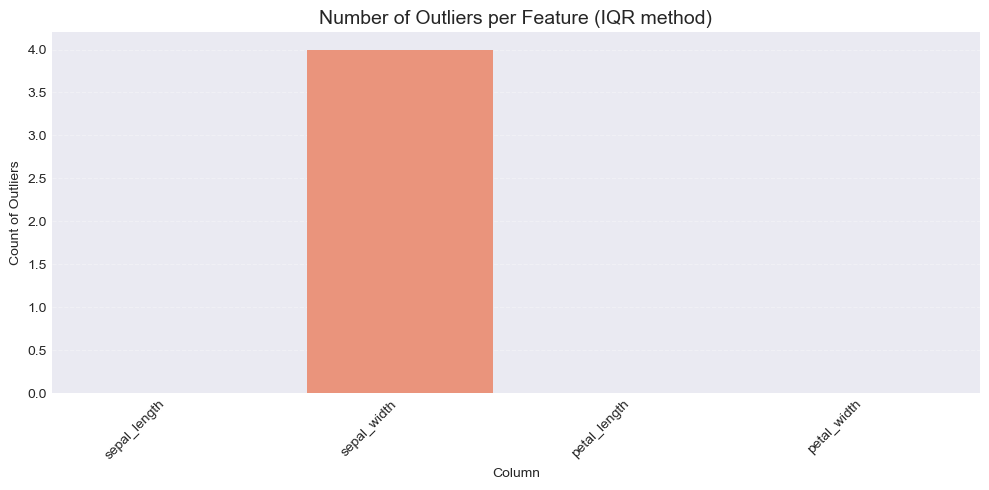

In [ ]:
# Barplot for outlier counts
plt.figure(figsize=(10, 5))
sns.barplot(x=outlier_df ['Column'], y=outlier_df ['IQR Outliers'], palette='Reds')
plt.title("Number of Outliers per Feature (IQR method)", fontsize=14)
plt.ylabel("Count of Outliers")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
# Function to cap outliers using IQR method
def cap_outliers_iqr(df, column, iqr_factor=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - iqr_factor * IQR
    upper_bound = Q3 + iqr_factor * IQR
    
    
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    
    print(f"{column}: Capped {len(df[df[column] < lower_bound])} low + "
          f"{len(df[df[column] > upper_bound])} high values")
    
    return df

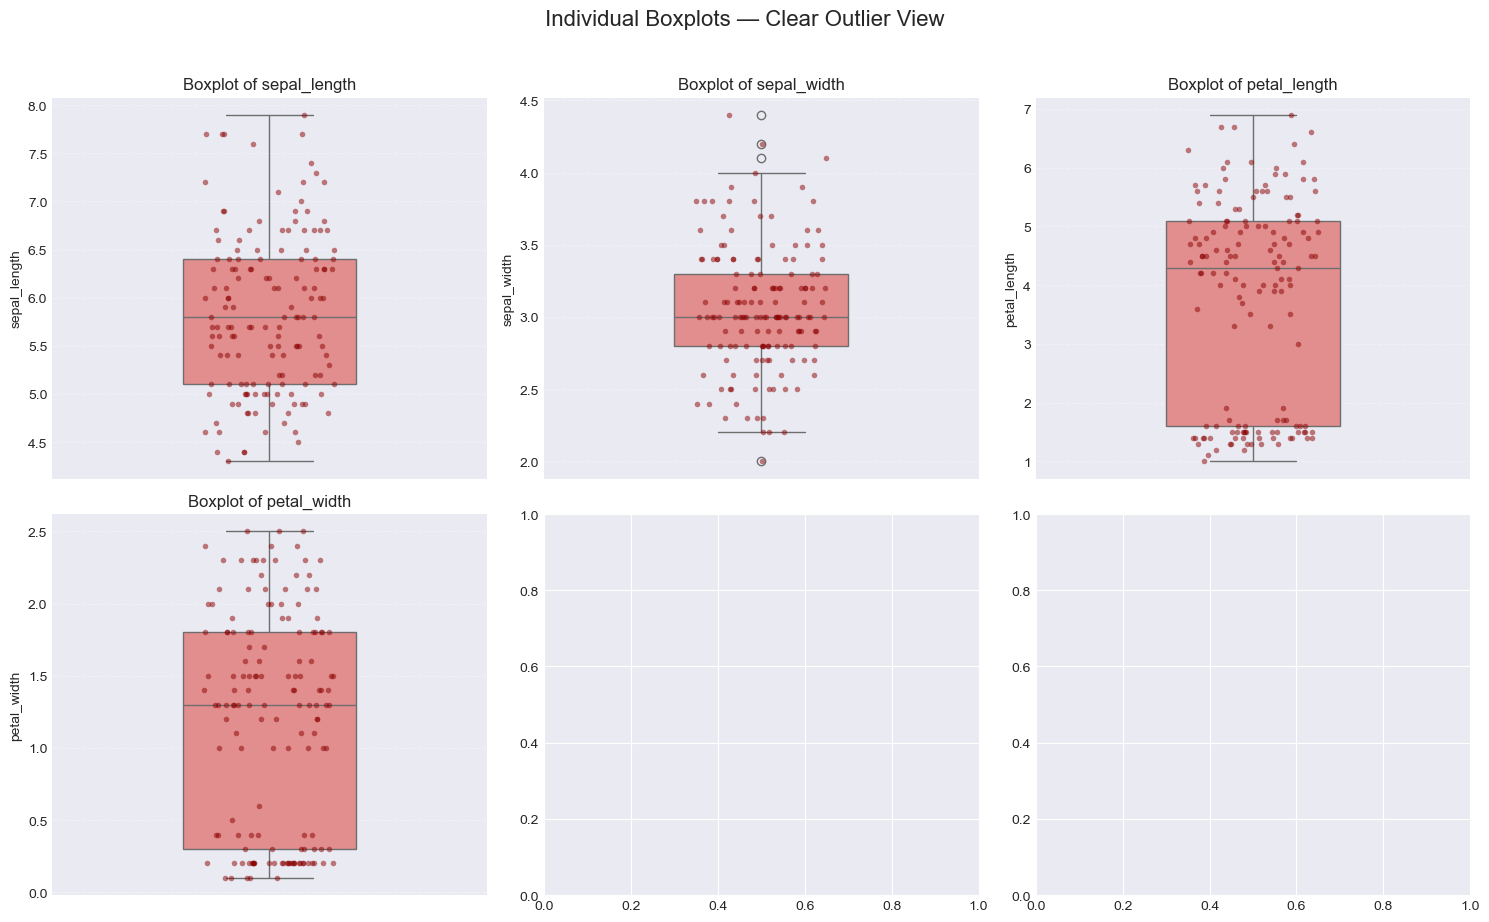

In [141]:
#Boxplot for outliers capped
fig, axes = plt.subplots(2, 3, figsize=(15, 9))
axes = axes.flatten()

for i, col in enumerate(df[important_cols]):
    sns.boxplot(y=df[col], ax=axes[i], color='lightcoral', width=0.4)
    sns.stripplot(y=df[col], ax=axes[i], color='darkred', alpha=0.5, size=4, jitter=0.15)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel(col)
    axes[i].grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle("Individual Boxplots — Clear Outlier View", fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

In [142]:
#Label encoding for Target column to convert it to numerical
le = LabelEncoder()
df['species'] = le.fit_transform(df['species'])
print("\nAfter Encoding Species:\n", df.head())


After Encoding Species:
    sepal_length  sepal_width  petal_length  petal_width  species  \
0           5.1          3.5           1.4          0.2        0   
1           4.9          3.0           1.4          0.2        0   
2           4.7          3.2           1.3          0.2        0   
3           4.6          3.1           1.5          0.2        0   
4           5.0          3.6           1.4          0.2        0   

   species_color  
0              0  
1              0  
2              0  
3              0  
4              0  


## Feature Engineering

In [143]:
#Feature Engineering
df['sepal_ratio'] = df['sepal_length'] / (df['sepal_width'] + 1e-6)
df['petal_ratio'] = df['petal_length'] / (df['petal_width'] + 1e-6)
df['sepal_area'] = df['sepal_length'] * df['sepal_width']
df['petal_area'] = df['petal_length'] * df['petal_width']
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features = poly.fit_transform(df[numerical_cols])
poly_feature_names = poly.get_feature_names_out(numerical_cols)
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names)
df = pd.concat([df, poly_df.drop(columns=numerical_cols)], axis=1)  # Drop original cols to avoid duplication
print("\nAfter Adding Polynomial Features:\n", df.head())
new_features = [col for col in df.columns if col not in df[numerical_cols]]

print("\nNew engineered features:")
print(new_features)



After Adding Polynomial Features:
    sepal_length  sepal_width  petal_length  petal_width  species  \
0           5.1          3.5           1.4          0.2      0.0   
1           4.9          3.0           1.4          0.2      0.0   
2           4.7          3.2           1.3          0.2      0.0   
3           4.6          3.1           1.5          0.2      0.0   
4           5.0          3.6           1.4          0.2      0.0   

   species_color  sepal_ratio  petal_ratio  sepal_area  petal_area  \
0            0.0     1.457142     6.999965       17.85        0.28   
1            0.0     1.633333     6.999965       14.70        0.28   
2            0.0     1.468750     6.499968       15.04        0.26   
3            0.0     1.483870     7.499963       14.26        0.30   
4            0.0     1.388889     6.999965       18.00        0.28   

   sepal_length^2  sepal_length sepal_width  sepal_length petal_length  \
0           26.01                     17.85                 

In [144]:
# Final Engineered Dataset Info
print("\nFinal Engineered Dataset Info:")
df.fillna(df.max(),inplace=True)
df.info()
print("\nFinal Dataset Description:\n", df.describe())

# Optional: Save the engineered dataset
df.to_csv('F:\Project\Iris Flower Classification\iris_engineered.csv', index=False)
print("\nEngineered dataset saved as 'iris_engineered.csv'")


Final Engineered Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 0 to 142
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sepal_length               150 non-null    float64
 1   sepal_width                150 non-null    float64
 2   petal_length               150 non-null    float64
 3   petal_width                150 non-null    float64
 4   species                    150 non-null    float64
 5   species_color              150 non-null    float64
 6   sepal_ratio                150 non-null    float64
 7   petal_ratio                150 non-null    float64
 8   sepal_area                 150 non-null    float64
 9   petal_area                 150 non-null    float64
 10  sepal_length^2             150 non-null    float64
 11  sepal_length sepal_width   150 non-null    float64
 12  sepal_length petal_length  150 non-null    float64
 13  sepal_length petal_widt

In [145]:
df.species.value_counts()

species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64

In [146]:
#Class imbalance check
print(df.species.value_counts())
print('📊class imbalance level is very less so proceed without balancing techniques')

species
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64
📊class imbalance level is very less so proceed without balancing techniques


In [147]:
#spliting the dataset to x and y 
x=df.drop(['species','species_color'],axis=1)
y=df['species']

In [148]:
#Test train spliting
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
print(f"\n✅ Train-Test Split Complete:")
print(f"   Training set: {x_train.shape[0]:,} samples ({x_train.shape[0]/len(df)*100:.0f}%)")
print(f"   Test set: {x_test.shape[0]:,} samples ({x_test.shape[0]/len(df)*100:.0f}%)")


✅ Train-Test Split Complete:
   Training set: 120 samples (80%)
   Test set: 30 samples (20%)


In [ ]:
#Target Variable dtype change from float to int
y_test.astype(int)

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
146    2
108    2
144    2
45     0
30     0
Name: species, dtype: int64

In [150]:
#using robustscaler for Feature scaling
scaler=RobustScaler()
x_train_sc=scaler.fit_transform(x_train)
x_test_sc=scaler.transform(x_test)
print(x_train_sc.shape)
print(x_test_sc.shape)


(120, 18)
(30, 18)


In [151]:
x_train_sc

array([[-0.88461538,  1.        , -0.90277778, ..., -0.71822391,
        -0.59530464, -0.52380952],
       [-0.03846154,  2.33333333, -0.76388889, ..., -0.66561448,
        -0.55058692, -0.48571429],
       [ 0.73076923,  0.16666667,  0.04166667, ...,  0.05450337,
         0.07098938,  0.08571429],
       ...,
       [ 0.03846154,  1.66666667, -0.84722222, ..., -0.69970539,
        -0.59083287, -0.52380952],
       [ 0.03846154, -0.66666667, -0.06944444, ..., -0.08691077,
        -0.08105087, -0.07936508],
       [ 1.03846154,  0.        ,  0.45833333, ...,  0.70475589,
         0.76746786,  0.86349206]])

In [152]:
#convert the arrayvalues to Dataframe
x_train_sc=pd.DataFrame(x_train_sc,columns=x_train.columns)
x_test_sc=pd.DataFrame(x_test_sc,columns=x_test.columns)

In [153]:
#checks if the variable is an instance of the Pandas Series class
x_train_sc = x_train_sc.to_frame() if isinstance(x_train_sc, pd.Series) else x_train_sc
x_test_sc = x_test_sc.to_frame() if isinstance(x_test_sc, pd.Series) else x_test_sc

In [154]:
#shape of the splited dataset
print("x_train_sc shape:", x_train_sc.shape)
print("x_test_sc shape:", x_test_sc.shape)
print("x_train_sc type:", type(x_train_sc))
print("x_test_sc type:", type(x_test_sc))

x_train_sc shape: (120, 18)
x_test_sc shape: (30, 18)
x_train_sc type: <class 'pandas.core.frame.DataFrame'>
x_test_sc type: <class 'pandas.core.frame.DataFrame'>


In [155]:
y_train.astype(int)

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: species, Length: 120, dtype: int64

In [156]:
x_train_sc

,sepal_length,sepal_width,petal_length,petal_width,sepal_ratio,petal_ratio,sepal_area,petal_area,sepal_length^2,sepal_length sepal_width,sepal_length petal_length,sepal_length petal_width,sepal_width^2,sepal_width petal_length,sepal_width petal_width,petal_length^2,petal_length petal_width,petal_width^2
0,-0.884615,1.000000,-0.902778,-0.733333,-1.054481,0.852811,-0.233161,-0.592160,-0.796321,-0.225179,-0.807479,-0.709807,1.064516,-0.873441,-0.712148,-0.718224,-0.595305,-0.523810
1,-0.038462,2.333333,-0.763889,-0.600000,-1.029645,0.222893,1.532642,-0.547679,-0.038462,1.518936,-0.645161,-0.573363,2.784946,-0.555054,-0.463196,-0.665614,-0.550587,-0.485714
2,0.730769,0.166667,0.041667,0.066667,0.186835,-0.083067,0.639378,0.070614,0.790970,0.636643,0.214917,0.138952,0.163978,0.192093,0.154399,0.054503,0.070989,0.085714
3,-0.730769,0.666667,-0.736111,-0.733333,-0.866232,2.364625,-0.282902,-0.578816,-0.670569,-0.274309,-0.680912,-0.705794,0.688172,-0.678164,-0.721724,-0.652567,-0.581889,-0.523810
4,-1.038462,0.333333,-0.819444,-0.733333,-0.917886,1.608718,-0.747150,-0.585488,-0.916722,-0.732856,-0.761455,-0.713820,0.333333,-0.814009,-0.731299,-0.689184,-0.588597,-0.523810
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.269231,-0.333333,-0.069444,0.000000,0.211115,-0.116294,-0.125389,-0.036141,0.277258,-0.118731,0.006164,-0.006521,-0.311828,-0.066861,-0.013166,-0.086911,-0.036333,0.000000
116,-0.653846,-0.833333,0.069444,0.266667,-0.095974,-0.332919,-1.126425,0.236308,-0.605686,-1.107472,-0.090405,0.033609,-0.739247,-0.061555,0.132855,0.091961,0.237563,0.380952
117,0.038462,1.666667,-0.847222,-0.733333,-0.812512,1.356749,1.143005,-0.587712,0.038462,1.134084,-0.710499,-0.685729,1.881720,-0.746086,-0.692998,-0.699705,-0.590833,-0.523810
118,0.038462,-0.666667,-0.069444,-0.066667,0.284451,0.012921,-0.539896,-0.080623,0.038462,-0.528147,-0.043148,-0.103837,-0.602151,-0.151764,-0.137642,-0.086911,-0.081051,-0.079365


In [157]:
#Dimentionality Reduction
pca=PCA(n_components=10)
x_train_pca=pca.fit_transform(x_train_sc)
x_test_pca=pca.transform(x_test_sc)

In [158]:
print(y_train.describe())

count    120.000000
mean       0.991667
std        0.814736
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: species, dtype: float64


## Model Building

In [159]:
#function for model training and evaluation
def train_and_evaluate(model, x_train, x_test, y_train, y_test, param_grid, model_name):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=5,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        error_score='raise'   
    )
    grid_search.fit(x_train,y_train)

    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    cv_score = grid_search.best_score_

    y_pred = best_model.predict(x_test)

    # ── Get probability / score ───────────────────────────────────────────────
    y_score = None
    if hasattr(best_model, 'predict_proba'):
        y_proba = best_model.predict_proba(x_test)         
        y_score = y_proba                                  
    elif hasattr(best_model, 'decision_function'):
        y_score = best_model.decision_function(x_test)

    # ── Metrics ────────────────────────────────────────────────────────────────
    acc = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred, digits=4, zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    # ROC-AUC & PR-AUC ─────────────────────────────────────────────────────────
    roc_auc = None
    pr_auc = None
    n_classes = len(best_model.classes_)

    if y_score is not None:
        try:
            if n_classes == 2:
               
                if y_score.ndim == 2:
                    y_score_bin = y_score[:, 1]
                else:
                    y_score_bin = y_score
                roc_auc = roc_auc_score(y_test, y_score_bin)
                pr_auc  = average_precision_score(y_test, y_score_bin)

            else:
                # Multiclass
                roc_auc = roc_auc_score(
                    y_test, y_score,
                    multi_class='ovr',     
                    average='macro',      
                    labels=best_model.classes_
                )
                pr_auc = average_precision_score(
                    y_test, y_score,
                    average='macro'
                )

        except ValueError as e:
            print(f"Could not compute ROC/PR AUC: {e}")

    # ── Pretty printing ───────────────────────────────────────────────────────
    print(f"\n{'='*65}")
    print(f"Model: {model_name}")
    print(f"{model_name} Best parameters: {best_params}")
    print(f"CV accuracy (5-fold): {cv_score:.4f}")
    print(f"Test accuracy:       {acc:.4f}")
    if roc_auc is not None:
        print(f"ROC-AUC:             {roc_auc:.4f}")
    if pr_auc is not None:
        print(f"PR-AUC:              {pr_auc:.4f}")
    print(f"{'-'*65}")
    print("Classification Report:")
    print(class_report)
    print(f"{'-'*65}")
    print("Confusion Matrix:")
    print(cm)
    print(f"{'='*65}\n")

    return best_model, best_params, cv_score,y_pred,y_proba

In [160]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l2'],
    'solver': ['lbfgs', 'sag', 'saga'],
    'l1_ratio': [0.1,0.3, 0.5,0.7, 0.9,1.0],  
    'max_iter': [50,100, 300,500],
    'fit_intercept': [True, False],
    }
lr_best_model, lr_best_params, lr_cv_score,lr_y_pred,lr_proba= train_and_evaluate(lr_model,x_train_sc,x_test_sc,y_train,y_test,lr_param_grid, "Logistic Regression")
lr_best_model1, lr_best_params1, lr_cv_score1,lr_y_pred1,lr_proba1= train_and_evaluate(lr_model,x_train_pca,x_test_pca,y_train,y_test,lr_param_grid, "Logistic Regression for pca")


Fitting 5 folds for each of 1008 candidates, totalling 5040 fits



Model: Logistic Regression
Logistic Regression Best parameters: {'C': 10, 'fit_intercept': False, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
CV accuracy (5-fold): 0.9583
Test accuracy:       1.0000
ROC-AUC:             1.0000
PR-AUC:              1.0000
-----------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        10
         1.0     1.0000    1.0000    1.0000         9
         2.0     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

-----------------------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Fitting 5 folds for each of 1008 candidates, totalling 5040 fits

Model: Logistic Regression for pca
Logistic Regression for pca

In [161]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan','minkowski'],
    'leaf_size': [10, 20, 30, 40, 50],
    'p': [1, 2, 3, 4, 5],
    'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']}
knn_best_model, knn_best_params, knn_cv_score,knn_y_pred,knn_proba= train_and_evaluate(knn_model, x_train_sc,x_test_sc,y_train,y_test,knn_param_grid, "K-Nearest Neighbors")
knn_best_model1, knn_best_params1, knn_cv_score1,knn_y_pred1,knn_proba1= train_and_evaluate(knn_model, x_train_pca,x_test_pca,y_train,y_test,knn_param_grid, "K-Nearest Neighbors for pca")

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits


  File "c:\Users\watersprinter\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\watersprinter\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\watersprinter\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
                        pass_fds, cwd, env,
                        ^^^^^^^^^^^^^^^^^^^
    ...<5 lines>...
                        gid, gids, uid, umask,
                        ^^^^^^^^^^^^^^^^^^^^^^
                        start_new_session, process_group)
                        ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\watersp


Model: K-Nearest Neighbors
K-Nearest Neighbors Best parameters: {'algorithm': 'auto', 'leaf_size': 10, 'metric': 'manhattan', 'n_neighbors': 9, 'p': 1, 'weights': 'uniform'}
CV accuracy (5-fold): 0.9500
Test accuracy:       1.0000
ROC-AUC:             1.0000
PR-AUC:              1.0000
-----------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        10
         1.0     1.0000    1.0000    1.0000         9
         2.0     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

-----------------------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits

Model: K-Nearest Neighbors for pca
K-Nearest Neighbor

In [162]:
#Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'splitter': ['best', 'random']
}
dt_best_model, dt_best_params, dt_cv_score,dt_y_pred,dt_proba= train_and_evaluate(dt_model, x_train_sc,x_test_sc,y_train,y_test,dt_param_grid, "Decision Tree")
dt_best_model1, dt_best_params1, dt_cv_score1,dt_y_pred1,dt_proba1= train_and_evaluate(dt_model, x_train_pca,x_test_pca,y_train,y_test,dt_param_grid, "Decision Tree for pca")

Fitting 5 folds for each of 720 candidates, totalling 3600 fits

Model: Decision Tree
Decision Tree Best parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'best'}
CV accuracy (5-fold): 0.9500
Test accuracy:       1.0000
ROC-AUC:             1.0000
PR-AUC:              1.0000
-----------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        10
         1.0     1.0000    1.0000    1.0000         9
         2.0     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

-----------------------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Fitting 5 folds

In [163]:
#  Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [None, 3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [ 'sqrt', 'log2'],
    'class_weight': ['balanced', None],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'bootstrap': [True, False]
}
rf_best_model, rf_best_params, rf_cv_score,rf_y_pred,rf_proba = train_and_evaluate(rf_model, x_train_sc,x_test_sc,y_train,y_test,rf_param_grid, "Random Forest")
rf_best_model1, rf_best_params1, rf_cv_score1,rf_y_pred1,rf_proba1 = train_and_evaluate(rf_model, x_train_pca,x_test_pca,y_train,y_test,rf_param_grid, "Random Forest for pca")

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits

Model: Random Forest
Random Forest Best parameters: {'bootstrap': True, 'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
CV accuracy (5-fold): 0.9583
Test accuracy:       1.0000
ROC-AUC:             1.0000
PR-AUC:              1.0000
-----------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        10
         1.0     1.0000    1.0000    1.0000         9
         2.0     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

-----------------------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0

In [164]:
#XGBoost
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_param_grid = {
    'n_estimators': [50, 100, 200,300],
    'learning_rate': [0.1, 0.2, 0.3],
    'max_depth': [ 3, 5, 7, 10],
    'min_child_weight': [ 3, 5, 7, 10], 
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [1, 2, 3, 4],
    'reg_lambda':[1,2,3,4,5]
}
xgb_best_model,xgb_best_params,xgb_cv_score,xgb_y_pred,xgb_proba = train_and_evaluate(xgb_model,x_train_sc,x_test_sc,y_train,y_test,xgb_param_grid, "xgboost")
xgb_best_model1,xgb_best_params1,xgb_cv_score1,xgb_y_pred1,xgb_proba1 = train_and_evaluate(xgb_model,x_train_pca,x_test_pca,y_train,y_test,xgb_param_grid, "xgboost for pca")

Fitting 5 folds for each of 34560 candidates, totalling 172800 fits

Model: xgboost
xgboost Best parameters: {'colsample_bytree': 0.8, 'gamma': 1, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 10, 'n_estimators': 200, 'reg_lambda': 1, 'subsample': 0.8}
CV accuracy (5-fold): 0.9583
Test accuracy:       0.9667
ROC-AUC:             1.0000
PR-AUC:              1.0000
-----------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        10
         1.0     1.0000    0.8889    0.9412         9
         2.0     0.9167    1.0000    0.9565        11

    accuracy                         0.9667        30
   macro avg     0.9722    0.9630    0.9659        30
weighted avg     0.9694    0.9667    0.9664        30

-----------------------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]

Fitting 5 folds for each of 34

In [165]:
# 5.6 LightGBM
lgbm_model = LGBMClassifier(random_state=42, verbose=-1)
lgbm_param_grid = {
    'n_estimators': [50, 100, 200,300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'min_child_weight': [1, 3, 5, 7, 10],
    'subsample': [0.8, 0.9, 1.0],
    'reg_lambda':[1,2,3],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
lgbm_best_model,lgbm_best_params,lgbm_cv_score,lgbm_y_pred,lgbm_proba = train_and_evaluate(lgbm_model,x_train_sc,x_test_sc,y_train,y_test,lgbm_param_grid, "lgbm classifier")
lgbm_best_model1,lgbm_best_params1,lgbm_cv_score1,lgbm_y_pred1,lgbm_proba1 = train_and_evaluate(lgbm_model,x_train_pca,x_test_pca,y_train,y_test,lgbm_param_grid, "lgbm classifier for pca")

Fitting 5 folds for each of 14580 candidates, totalling 72900 fits

Model: lgbm classifier
lgbm classifier Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 300, 'num_leaves': 31, 'reg_lambda': 3, 'subsample': 0.8}
CV accuracy (5-fold): 0.9667
Test accuracy:       1.0000
ROC-AUC:             1.0000
PR-AUC:              1.0000
-----------------------------------------------------------------
Classification Report:
              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        10
         1.0     1.0000    1.0000    1.0000         9
         2.0     1.0000    1.0000    1.0000        11

    accuracy                         1.0000        30
   macro avg     1.0000    1.0000    1.0000        30
weighted avg     1.0000    1.0000    1.0000        30

-----------------------------------------------------------------
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Fitting 5

In [185]:
#Best model 
print('✅ LightGBM is selected as final model for without Dimensionality reduction')
print('✅ K-Nearest Neighbors,xgboost,Logistic Regression is selected as final model for with Dimensionality reduction')

✅ LightGBM is selected as final model for without Dimensionality reduction
✅ K-Nearest Neighbors,xgboost,Logistic Regression is selected as final model for with Dimensionality reduction


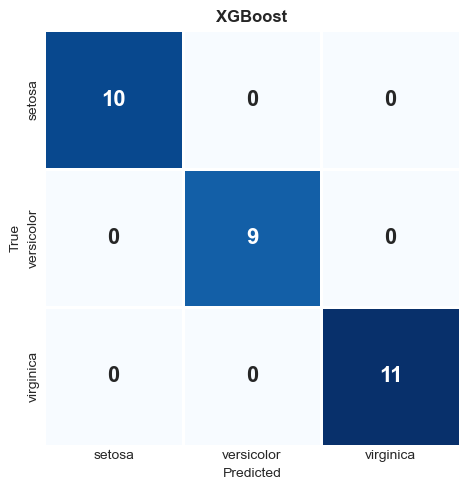

In [181]:
#confusion matrix for the best MOdel
fig, axes = plt.subplots(1,1, figsize=(18, 5))

cm=confusion_matrix(y_test,lgbm_y_pred)
sns.heatmap(cm,annot=True,fmt='d', cmap='Blues', ax=axes,
                cbar=False, square=True, linewidths=2,
                annot_kws={'fontsize': 16, 'fontweight': 'bold'})
axes.set_title(f'XGBoost',fontsize=12, fontweight='bold')
axes.set_xlabel('Predicted', fontsize=10)
axes.set_ylabel('True', fontsize=10)
axes.set_xticklabels(['setosa', 'versicolor', 'virginica'])
axes.set_yticklabels(['setosa', 'versicolor', 'virginica'])
plt.tight_layout()
plt.show()

In [168]:
y_test.values

array([1., 0., 2., 1., 1., 0., 1., 2., 1., 1., 2., 0., 0., 0., 0., 1., 2.,
       1., 1., 2., 0., 2., 0., 2., 2., 2., 2., 2., 0., 0.])

In [169]:
y_test1=y_test.values
print(y_test1)

[1. 0. 2. 1. 1. 0. 1. 2. 1. 1. 2. 0. 0. 0. 0. 1. 2. 1. 1. 2. 0. 2. 0. 2.
 2. 2. 2. 2. 0. 0.]


## Sample Data prediction

In [170]:
# Sample predictions
Data=[[5.1,3.5,1.4,0.2,'setosa'],
     [6.7,3.0,5.2,2.3,'virginica'],
     [6.3,3.3,4.7,1.6,'versicolor']]
Data1=pd.DataFrame(Data,columns=['sepal_length','sepal_width','petal_length','petal_width','species'])
print(Data1)
Data1['sepal_ratio'] = Data1['sepal_length'] / (Data1['sepal_width'] + 1e-6)
Data1['petal_ratio'] = Data1['petal_length'] / (Data1['petal_width'] + 1e-6)
Data1['sepal_area'] = Data1['sepal_length'] * Data1['sepal_width']
Data1['petal_area'] = Data1['petal_length'] * Data1['petal_width']
numerical_cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
poly1 = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)
poly_features1= poly.fit_transform(Data1[numerical_cols])
poly_feature_names1= poly.get_feature_names_out(numerical_cols)
poly_Data1 = pd.DataFrame(poly_features1, columns=poly_feature_names1)
Data1 = pd.concat([Data1, poly_Data1.drop(columns=numerical_cols)], axis=1) 
Data1.drop(['species'],axis=1,inplace=True)
print(Data1)



   sepal_length  sepal_width  petal_length  petal_width     species
0           5.1          3.5           1.4          0.2      setosa
1           6.7          3.0           5.2          2.3   virginica
2           6.3          3.3           4.7          1.6  versicolor
   sepal_length  sepal_width  petal_length  petal_width  sepal_ratio  \
0           5.1          3.5           1.4          0.2     1.457142   
1           6.7          3.0           5.2          2.3     2.233333   
2           6.3          3.3           4.7          1.6     1.909090   

   petal_ratio  sepal_area  petal_area  sepal_length^2  \
0     6.999965       17.85        0.28           26.01   
1     2.260869       20.10       11.96           44.89   
2     2.937498       20.79        7.52           39.69   

   sepal_length sepal_width  sepal_length petal_length  \
0                     17.85                       7.14   
1                     20.10                      34.84   
2                     20.79     

In [171]:
#Data information for sample prediction values
Data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   sepal_length               3 non-null      float64
 1   sepal_width                3 non-null      float64
 2   petal_length               3 non-null      float64
 3   petal_width                3 non-null      float64
 4   sepal_ratio                3 non-null      float64
 5   petal_ratio                3 non-null      float64
 6   sepal_area                 3 non-null      float64
 7   petal_area                 3 non-null      float64
 8   sepal_length^2             3 non-null      float64
 9   sepal_length sepal_width   3 non-null      float64
 10  sepal_length petal_length  3 non-null      float64
 11  sepal_length petal_width   3 non-null      float64
 12  sepal_width^2              3 non-null      float64
 13  sepal_width petal_length   3 non-null      float64
 14

In [179]:
#Prediction without Dimensionality reduction
Data1_sc=scaler.transform(Data1)
single=lgbm_best_model.predict(Data1_sc)
print(single.astype(int).reshape(-1,1))
for i in single:
    if (i==0).all():
        print('setosa')
    elif (i==1).all():
        print('versicolor')
    else:
        print('virginica')

#{'setosa': 0, 'versicolor': 1, 'virginica': 2}

[[0]
 [2]
 [1]]
setosa
virginica
versicolor


In [180]:
#Prediction with Dimensionality reduction
Data1_sc1=scaler.transform(Data1)
Data1_pca=pca.transform(Data1_sc1)
single1=xgb_best_model1.predict(Data1_pca)
print(single1.astype(int).reshape(-1,1))

for i in single1:
    if (i==0).all():
        print('setosa')
    elif (i==1).all():
        print('versicolor')
    else:
        print('virginica')
#{'setosa': 0, 'versicolor': 1, 'virginica': 2}


[[0]
 [2]
 [1]]
setosa
virginica
versicolor
